# 1. Carga de Dados e Amostragem

In [1]:
import pandas as pd
import re
import nltk
nltk.download('stopwords', quiet=True);

In [2]:
df = pd.read_csv('Reviews.csv', usecols=['Text'])
df = df.sample(n=10000, random_state=42)
df = df.reset_index(drop=True)
df.head()

,Text
0,Having tried a couple of other brands of glute...
1,My cat loves these treats. If ever I can't fin...
2,A little less than I expected. It tends to ha...
3,"First there was Frosted Mini-Wheats, in origin..."
4,and I want to congratulate the graphic artist ...


# 2. Pré-processamento: Limpeza e Normalização

In [3]:
from nltk.corpus import stopwords
stop_words = stopwords.words('English')

In [4]:
# Definindo e aplicando pipeline de limpeza para remover ruidos, tags HTML e palavras irrelevantes.
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower().split()
    text = [w for w in text if not w in stop_words]
    return " ".join(text).strip()   

df['Text'] = df['Text'].apply(clean_text)
df.head()

,Text
0,tried couple brands gluten free sandwich cooki...
1,cat loves treats ever find house pop top bolts...
2,little less expected tends muddy taste expecte...
3,first frosted mini wheats original size froste...
4,want congratulate graphic artist putting entir...


# 3. Vetorização: Transformando Texto em Números

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
# Convertendo o texto limpo em uma matriz numérica ponderada pelo peso das palavras (TF-IDF).
vectorizer = TfidfVectorizer(max_features=1000)
x = vectorizer.fit_transform(df['Text'])
print(x.shape)

(10000, 1000)


# 4. Modelagem: Latent Dirichlet Allocation (LDA)

In [7]:
from sklearn.decomposition import LatentDirichletAllocation

In [8]:
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(x)

LatentDirichletAllocation(n_components=5, random_state=42)

# 5. Resultados: Extração de Palavras por Tópico

In [9]:
# Recuperando o vocabulário e mapeando os índices de maior peso para identificar os temas de cada tópico.
words = vectorizer.get_feature_names_out()

for i, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-11:-1]
    top_words = [words[idx] for idx in top_words_idx]
    print(f"Tópico #{i}: {top_words}")


Tópico #0: ['product', 'taste', 'like', 'water', 'use', 'good', 'sauce', 'oil', 'great', 'one']
Tópico #1: ['chocolate', 'like', 'taste', 'great', 'snack', 'good', 'bars', 'cookies', 'love', 'flavor']
Tópico #2: ['amazon', 'price', 'product', 'chips', 'great', 'find', 'order', 'store', 'good', 'buy']
Tópico #3: ['food', 'dog', 'treats', 'dogs', 'cat', 'loves', 'cats', 'one', 'eat', 'product']
Tópico #4: ['coffee', 'tea', 'cup', 'flavor', 'like', 'good', 'taste', 'strong', 'drink', 'cups']


# 6. Aplicação: Classificando os Comentários por Tópico

In [10]:
# Transformando as probabilidades em classificações diretas e visualizando a volumetria de cada assunto.
topic_results = lda.transform(x)
df['Topic'] = topic_results.argmax(axis=1)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

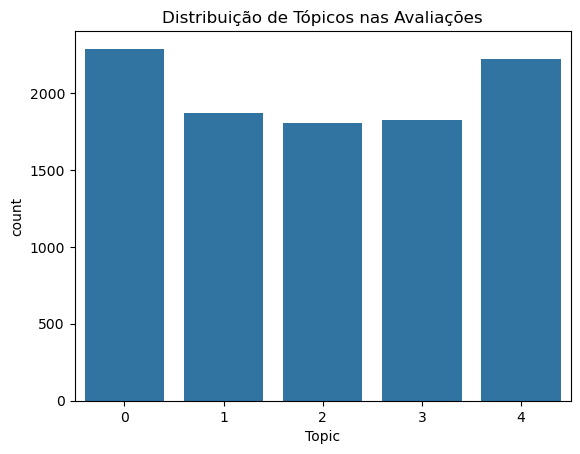

In [12]:
sns.countplot(x='Topic', data=df)
plt.title("Distribuição de Tópicos nas Avaliações")
plt.show()

# 7. Validação: Lendo Comentários por Tópico

In [13]:
topic_number = 4
examples = df[df['Topic'] == topic_number].sample(3)['Text'].values

for text in examples:
    print(f"- {text}")
    print("-" * 50)

- husband picky coffee drinker actually uses peculator brews coffee stove days clock fresh ground beans produces outstanding coffee takes lot time energy work morning love keurig purchased christmas never found decaf beans likes even starbucks coffee houses hates decaf actually likes decaf lot favorite k cup thus far
--------------------------------------------------
- used get certain light roast coffee company famous donkey man able find available lately went looking light roast could get time landed camano island much caffeine much liking brew alone blend darker roasts mellow bit automatic delivery plus also
--------------------------------------------------
- really curious blended black tea means say ingredients list smells tastes like menthol camphor eucalyptus oil nice blend cinnamon list removing wrapper strong aroma vick vapor rub gave second thoughts whether safe drink however want try alive still kicking positive thing say nice cinnamon flavor pleasantly lingers mouth packag

## 🚀 Conclusão do Projeto: Inteligência de Texto e Modelagem de Tópicos

Neste projeto de **Processamento de Linguagem Natural (NLP)**, demonstramos como a inteligência artificial pode transformar milhares de textos não estruturados em informações estratégicas de negócio, sem a necessidade de leitura manual.

### 🧠 O que foi desenvolvido:
1.  **Pipeline de NLP:** Construímos um sistema de limpeza que removeu ruidos (tags HTML, pontuações) e normalizou o vocabulário (Stopwords), focando apenas nas palavras que carregam significado.
2.  **Matemática do Texto:** Utilizamos a técnica **TF-IDF** para transformar palavras em vetores numéricos, priorizando termos que melhor descrevem cada avaliação.
3.  **Descoberta de Tópicos (LDA):** Aplicamos o modelo de **Latent Dirichlet Allocation** para agrupar as 10.000 avaliações em 5 temas centrais de forma totalmente automatizada.

### 📈 Resultados e Insights:
*   **Segmentação Automática:** O modelo identificou com precisão nichos de mercado, como o Tópico de **Bebidas Quentes (Café/Chá)** e o de **Experiência de Compra/Logística**.
*   **Validação Qualitativa:** Através da amostragem, confirmamos que o modelo agrupa palavras pelo contexto semântico (ex: reunindo termos de infusão e xícaras no mesmo assunto).
*   **Impacto de Negócio:** Essa abordagem permite que grandes empresas (como a Amazon) filtrem automaticamente milhares de feedbacks diários, direcionando críticas e elogios aos departamentos corretos de forma instantânea.

Este projeto solidifica a base para aplicações mais avançadas, como análise de sentimentos e chatbots inteligentes.